<a href="https://colab.research.google.com/github/Chichi213/Daiz_CPE-313/blob/main/Daiz_Skill_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import Adam, SGD
import keras

In [ ]:
xray_df = pd.read_csv(r"C:/Users/CHIZEL/Downloads/Data_Entry_2017.csv/Data_Entry_2017.csv")
# Dictionary to store image paths
all_image_paths = {}
# Function to check if a file is an image
def is_image_file(file):
    extensions = ['.png', '.jpg', '.jpeg', '.bmp']  # Add more extensions if needed
    return any(file.lower().endswith(ext) for ext in extensions)
# Recursively search for image files
for root, dirs, files in os.walk(r'C:/Users/CHIZEL/Downloads/Data_Entry_2017.csv/Skill_Exam_DataSci'):
    for file in files:
        if is_image_file(file):
            all_image_paths[os.path.basename(file)] = os.path.join(root, file)
# Print the number of scans found
print('Scans found:', len(all_image_paths), ', Total Headers', xray_df.shape[0])
# Map image paths to DataFrame based on 'Image Index'
xray_df['path'] = xray_df['Image Index'].map(all_image_paths.get)
xray_df


Scans found: 112120 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,path
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN,C:/Users/CHIZEL/Downloads/Data_Entry_2017.csv/...
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN,C:/Users/CHIZEL/Downloads/Data_Entry_2017.csv/...
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN,C:/Users/CHIZEL/Downloads/Data_Entry_2017.csv/...
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN,C:/Users/CHIZEL/Downloads/Data_Entry_2017.csv/...
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN,C:/Users/CHIZEL/Downloads/Data_Entry_2017.csv/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN,C:/Users/CHIZEL/Downloads/Data_Entry_2017.csv/...
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN,C:/Users/CHIZEL/Downloads/Data_Entry_2017.csv/...
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN,C:/Users/CHIZEL/Downloads/Data_Entry_2017.csv/...
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN,C:/Users/CHIZEL/Downloads/Data_Entry_2017.csv/...


In [ ]:
xray = xray_df.drop('Unnamed: 11', axis= 1)

In [ ]:
xray['Finding Labels'] = xray['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
from itertools import chain
all_labels = np.unique(list(chain(*xray['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        xray[c_label] = xray['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
xray.sample(3)

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
88526,00021930_001.png,,1,21930,52,F,AP,3056,2544,0.139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37447,00009873_001.png,,1,9873,37,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48373,00012266_006.png,Atelectasis,6,12266,56,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
MIN_CASES = 1000
all_labels = [c_label for c_label in all_labels if xray[c_label].sum()>MIN_CASES]
print('Clean Labels ({})'.format(len(all_labels)),
      [(c_label,int(xray[c_label].sum())) for c_label in all_labels])

Clean Labels (13) [('Atelectasis', 11559), ('Cardiomegaly', 2776), ('Consolidation', 4667), ('Edema', 2303), ('Effusion', 13317), ('Emphysema', 2516), ('Fibrosis', 1686), ('Infiltration', 19894), ('Mass', 5782), ('Nodule', 6331), ('Pleural_Thickening', 3385), ('Pneumonia', 1431), ('Pneumothorax', 5302)]


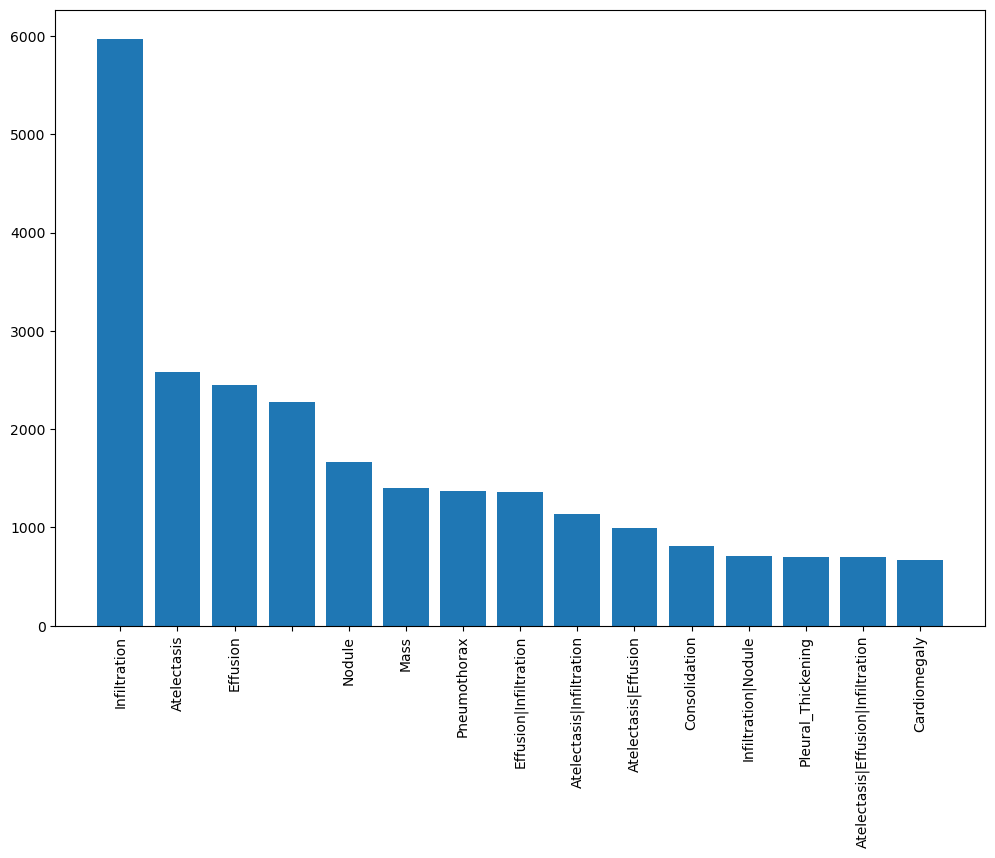

In [ ]:
# since the dataset is very unbiased, it can resample it to be a more reasonable collection
# weight is 0.1 + number of findings
sample_weights = xray['Finding Labels'].map(lambda x: len(x.split('|')) if len(x)>0 else 0).values + 4e-2
sample_weights /= sample_weights.sum()
all_xray_df = xray.sample(40000, weights=sample_weights)

label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

Training of Data

In [ ]:
# creating vector of diseases
xray['disease_vec'] = xray.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0])

In [ ]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(xray,
                                   test_size = 0.20,
                                   random_state = 2000,
                                   stratify = xray['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'test', test_df.shape[0])

train 89696 test 22424


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (128, 128)
core_idg = ImageDataGenerator(samplewise_center=True,
                              samplewise_std_normalization=True,
                              horizontal_flip = True,
                              vertical_flip = False,
                              height_shift_range= 0.05,
                              width_shift_range=0.1,
                              rotation_range=5,
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.15)

In [ ]:
valid_df['newLabel'] = valid_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)
train_df['newLabel'] = train_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)

In [ ]:
train_gen = core_idg.flow_from_dataframe(dataframe=train_df,
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel',
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 32)

valid_gen = core_idg.flow_from_dataframe(dataframe= valid_df,
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel',
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 256) # we can use much larger batches for evaluation
test_X, test_Y = next(core_idg.flow_from_dataframe(dataframe=valid_df,
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel',
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 1024))

Found 41319 validated image filenames belonging to 13 classes.
Found 10330 validated image filenames belonging to 13 classes.
Found 10330 validated image filenames belonging to 13 classes.


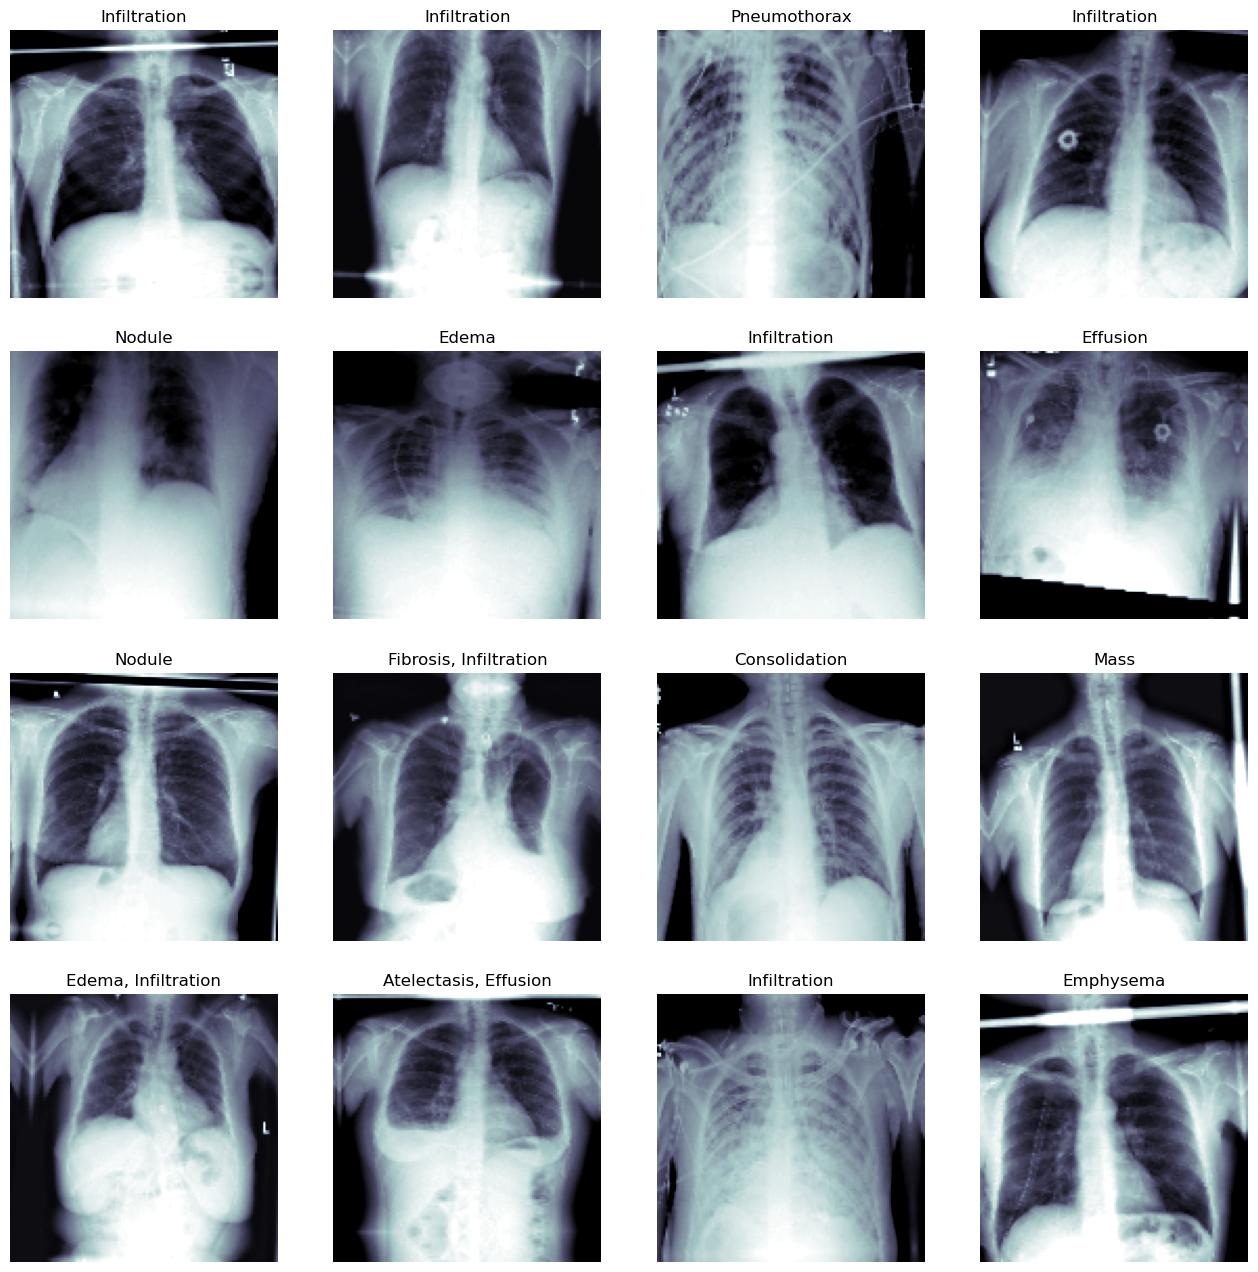

In [ ]:
t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -1.5, vmax = 1.5)
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(all_labels, c_y)
                             if n_score>0.5]))
    c_ax.axis('off')

Convolutional Nueral Network

In [ ]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop, SGD
model = Sequential()


model.add(Conv2D(32, (4, 4), strides = (1,1), padding='same',
                 input_shape=(128, 128, 1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (4, 4), strides = (1,1)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (4, 4), strides = (1,1)))
model.add(Activation('relu'))
model.add(Conv2D(64, (4, 4), strides = (1,1)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


## Flatten turns 3x3x32 into 288x1
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(all_labels), activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      544       
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      16416     
                                                                 
 activation_1 (Activation)   (None, 125, 125, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 62, 62, 32)        0         
                                                      

In [ ]:
#Regularization Technique
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('xray_class')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min', save_weights_only = True)

early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=5)
callbacks_list = [checkpoint, early]

In [ ]:
#Training the model
history = model.fit_generator(train_gen,
                                  steps_per_epoch=100,
                                  validation_data = (test_X, test_Y),
                                  epochs = 5,
                                  callbacks = callbacks_list)

Epoch 1/5
100/100 [==============================] - ETA: 0s - loss: 0.3308 - binary_accuracy: 0.8776
Epoch 1: val_loss did not improve from 0.34751
100/100 [==============================] - 331s 3s/step - loss: 0.3308 - binary_accuracy: 0.8776 - val_loss: 0.3673 - val_binary_accuracy: 0.8777
Epoch 2/5
100/100 [==============================] - ETA: 0s - loss: 0.3292 - binary_accuracy: 0.8781
Epoch 2: val_loss improved from 0.34751 to 0.33606, saving model to xray_class_weights.best.hdf5
100/100 [==============================] - 345s 3s/step - loss: 0.3292 - binary_accuracy: 0.8781 - val_loss: 0.3361 - val_binary_accuracy: 0.8776
Epoch 3/5
100/100 [==============================] - ETA: 0s - loss: 0.3286 - binary_accuracy: 0.8782
Epoch 3: val_loss did not improve from 0.33606
100/100 [==============================] - 317s 3s/step - loss: 0.3286 - binary_accuracy: 0.8782 - val_loss: 0.3384 - val_binary_accuracy: 0.8776
Epoch 4/5
100/100 [==============================] - ETA: 0s - lo

In [ ]:

for c_label, s_count in zip(all_labels, 100*np.mean(test_Y,0)):
    print('%s: %2.2f%%' % (c_label, s_count))

Atelectasis: 25.00%
Cardiomegaly: 4.79%
Consolidation: 11.04%
Edema: 4.49%
Effusion: 24.22%
Emphysema: 5.27%
Fibrosis: 2.93%
Infiltration: 36.82%
Mass: 12.70%
Nodule: 13.18%
Pleural_Thickening: 7.03%
Pneumonia: 3.03%
Pneumothorax: 8.69%


In [ ]:
pred_Y = model.predict(test_X, batch_size = 32, verbose = True)

32/32 [==============================] - 16s 496ms/step


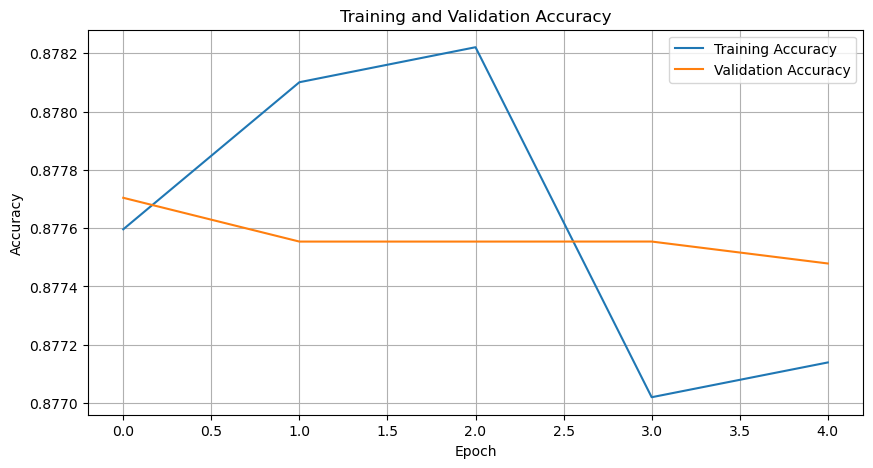

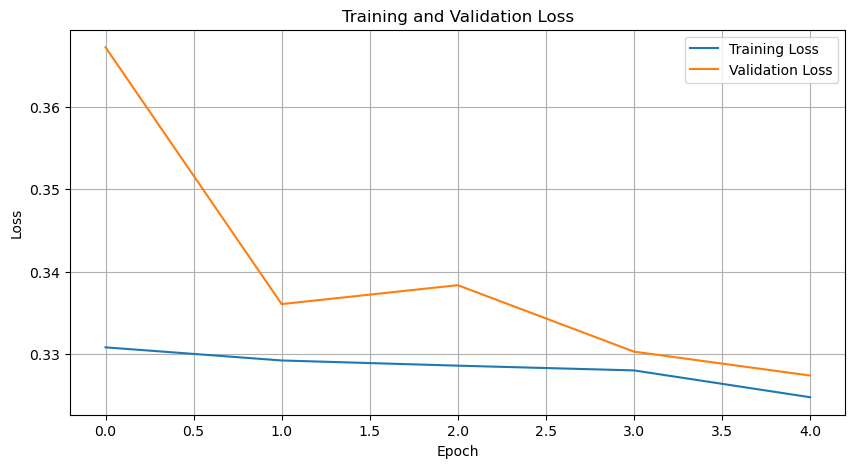

In [ ]:
#Plotting the Result
train_accuracy = history.history['binary_accuracy']
val_accuracy = history.history['val_binary_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

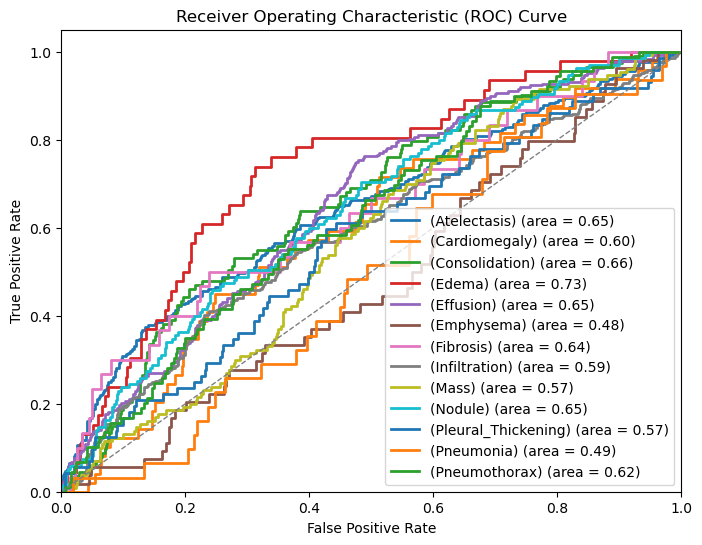

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(all_labels)):
    fpr[i], tpr[i], _ = roc_curve(test_Y[:, i], pred_Y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(len(all_labels)):
    plt.plot(fpr[i], tpr[i], lw=2, label='({}) (area = {:.2f})'.format(all_labels[i], roc_auc[i]))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Pre-trained Model

In [ ]:
train_steps_per_epoch = train_df.shape[0] // 32
valid_steps_per_epoch = valid_df.shape[0] // 32

In [ ]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
valid_data = ImageDataGenerator(rescale=1./255)

train_gene = train_data.flow_from_dataframe(
    dataframe=train_df,
    x_col="path",
    y_col=all_labels,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='raw')

valid_gene = valid_data.flow_from_dataframe(
    dataframe=valid_df,
    x_col="path",
    y_col=all_labels,
    target_size=IMG_SIZE,
    batch_size=64,
    class_mode='raw')

Found 89696 validated image filenames.
Found 22424 validated image filenames.


In [ ]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D, MaxPooling2D


# Load the pre-trained resnet50 model
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# Set the base model's layers as non-trainable
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(all_labels), activation='sigmoid')(x)
resnet_pretrained = Model(inputs=resnet.input, outputs=predictions)

In [ ]:
# Compile the model
resnet_pretrained.compile(optimizer=Adam(lr=0.001),
                         loss='binary_crossentropy',
                         metrics=['binary_accuracy'])

In [ ]:
resnet_pretrained.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_8[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
# Train the model
history_pretrained_dn = resnet_pretrained.fit(train_gene,
                                epochs=10,
                                steps_per_epoch=50,
                                validation_data=valid_gene,
                                validation_steps=valid_steps_per_epoch,
                                verbose=1)

Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 0.2498 - binary_accuracy: 0.9277

 Performing this task is very challenging because the dataset we have used contained of 112120 both in the images and also the csv files. In this examination, I used CNN and resnet50 for pre-training the model to change and also enhance the accuracy. In CNN part, after I trained the data using CNN with only 2 hidden layer, the accuracy that I got is almost 87% but giving the plot of this trained data is not good becuase the trained accuracy is like a zigzag line so it was hard for me to determined if this accuracy is very reliable same also in training and validation loss. Overall, performing this task is challenging for me especially we used a really big data, but performing this task gave me an experience and knowledge on how to implement CNN and pre-trained data when it comes in large data even though i didn't manage to finish it.